In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pickle
import plot_functions as pf
import importlib

# text rendering with LaTex
#plt.rc('text', usetex=True)
#plt.rc('font', family='times')

In [2]:
results2d = pickle.load(open('./../results/homogenization_results_2d.pcl', 'rb'))
results3d = pickle.load(open('./../results/homogenization_results_3d.pcl', 'rb'))
results = results3d + results2d
#

In [3]:
results_temp = []
for result in results3d:
    if result[0] == 'actin_cytosceleton_3d' and result[-1] == 'accuracy_vs_resolution' and result[8] < 0.8:
        print(result[8])
    else:
        results_temp.append(result)

0.04687499999999794
0.04687500000001652
0.04687500000004871
0.04687499999986784


In [4]:
#results_cns = pickle.load(open('./../results/homogenization_results_3d_cns.pcl', 'rb'))
#results_temp = results3d + results_cns

#results_temp = []
#gm = 'crossing_filaments_3d'
#for r in results3d:
#    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
#        pass
#    else:
#        results_temp.append(r)
print(results_temp)       
#print(results3d)   


[['actin_cytosceleton_3d', 2.0, 1.0, 8, 8, 8, array([[ 9.34020828e-01, -1.83502017e-04, -1.83502017e-04],
       [-1.83502017e-04,  9.34020828e-01, -1.83502017e-04],
       [-1.83502017e-04, -1.83502017e-04,  9.34020828e-01]]), array([[ 1.80744587e+00,  1.03416885e-03,  1.03416885e-03],
       [ 1.03416885e-03,  1.80744587e+00, -2.06791324e-02],
       [ 1.03416885e-03,  1.03416885e-03,  1.82915917e+00]]), 0.8281249999999883, 8.0, 2.0, '2019-07-26T10:51:49.767316', 'accuracy_vs_resolution'], ['actin_cytosceleton_3d', 2.0, 1.0, 16, 16, 16, array([[9.03040273e-01, 1.49333435e-05, 1.49333435e-05],
       [1.49333435e-05, 9.03040273e-01, 1.49333435e-05],
       [1.49333435e-05, 1.49333435e-05, 9.03040273e-01]]), array([[ 1.80189427e+00,  4.05459409e-04,  4.05459409e-04],
       [ 4.05459409e-04,  1.80189427e+00, -2.62307336e-02],
       [ 4.05459409e-04,  4.05459409e-04,  1.82853046e+00]]), 0.8281250000000938, 16.0, 4.0, '2019-07-26T10:52:03.928378', 'accuracy_vs_resolution'], ['actin_cyto

In [250]:

#pickle.dump(results_temp, open('./../results/homogenization_results.pcl', 'wb'))
#results3d = pickle.dump(results_temp,open('./../results/homogenization_results_3d.pcl', 'wb'))

In [1]:
importlib.reload(pf)

lx = 4.5
ly = 4.


bx = 0.37
sx = 0.22

pos1 = [0.37, 0.05, bx, bx*lx/ly]
pos2 = [0.37, 0.95-bx*lx/ly, bx, bx*lx/ly]
pos3 = [0.07, 0.95-sx*lx/ly, sx, sx*lx/ly] 
pos4 = [0.07, 0.5-sx*0.5*lx/ly, sx, sx*lx/ly]
pos5 = [0.07, 0.05, sx, sx*lx/ly]

fig_0 = plt.figure(figsize=(lx,ly), dpi=150, frameon=True)

pf.plot_different_box_reference_cells(fig_0, pos1)



pf.plot_different_channel_reference_cells(fig_0, pos2)


pf.plot_perturbed_channel_reference_cell(fig_0, pos3)


pf.plot_vertical_filaments_reference_cell(fig_0, pos4)


pf.plot_circle_in_a_box_reference_cell(fig_0, pos5)

pf.plot_2d_coordinate_system(fig_0, [0.85, 0.07, 0.1, 0.1])

steelblue_patch = mpatches.Patch(color='steelblue', label='Liquid phase')
darkgrey_patch = mpatches.Patch(color='darkgrey', label='Solid phase')

straigh_channel_line = mlines.Line2D([], [], color='crimson', label='Straight\n channel 2D')
diagonal_channels_line = mlines.Line2D([], [], color='gold', label='Diagonal\n channel 2D')

crossing_channels_line = mlines.Line2D([], [], color='darkorchid', label='Crossing\n channels 2D')
diagonal_box_line = mlines.Line2D([], [], color='turquoise', label='Diagonal box\n in a box 2D')
four_boxes_line = mlines.Line2D([], [], color='limegreen', label='Four boxes in\n a box 2D')
box_line = mlines.Line2D([], [], color='sandybrown', label='Box in a\n box 2D')

leg = fig_0.legend(handles=[steelblue_patch, darkgrey_patch, straigh_channel_line, diagonal_channels_line,
                            crossing_channels_line, diagonal_box_line, four_boxes_line, box_line],
                   loc=(0.75, 0.2), fontsize=8, )
leg.get_frame().set_linewidth(0.0)

fig_0.text(0.02, 0.92, 'A', fontsize=12)
fig_0.text(0.02, 0.5+sx*0.5*lx/ly-0.03, 'B', fontsize=12)
fig_0.text(0.02, 0.05+sx*lx/ly-0.03, 'C', fontsize=12)
fig_0.text(0.32, 0.92, 'D', fontsize=12)
fig_0.text(0.32, 0.05+bx*lx/ly-0.03, 'E', fontsize=12)

fig_0.savefig('./../results/geometries2d.pdf')
plt.show()

NameError: name 'importlib' is not defined

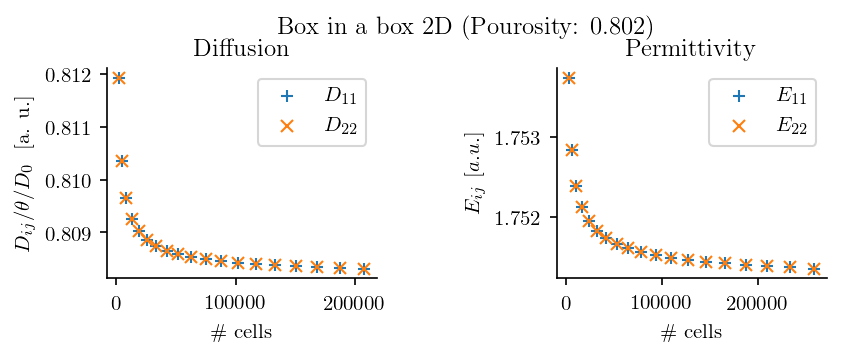

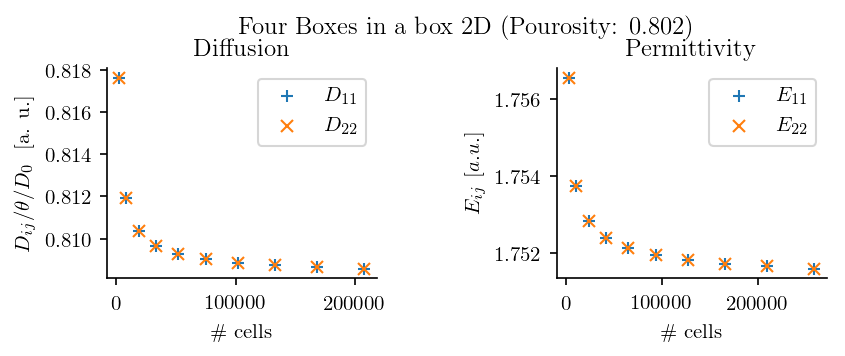

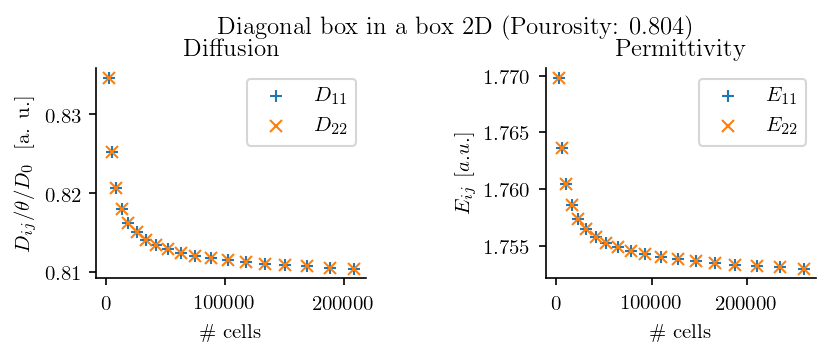

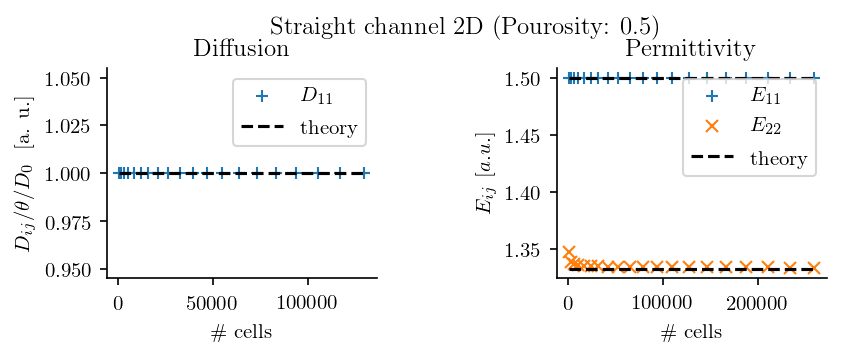

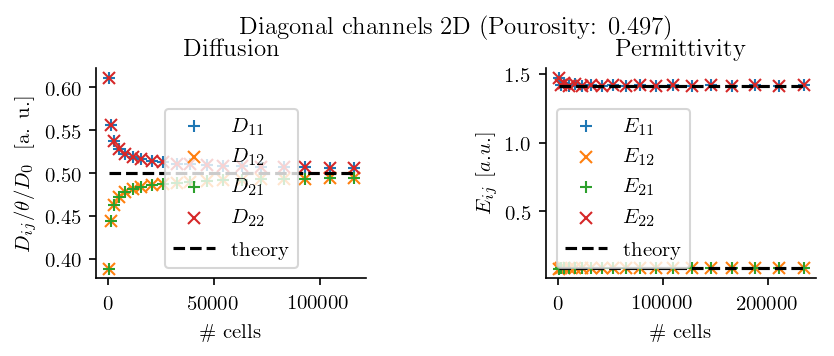

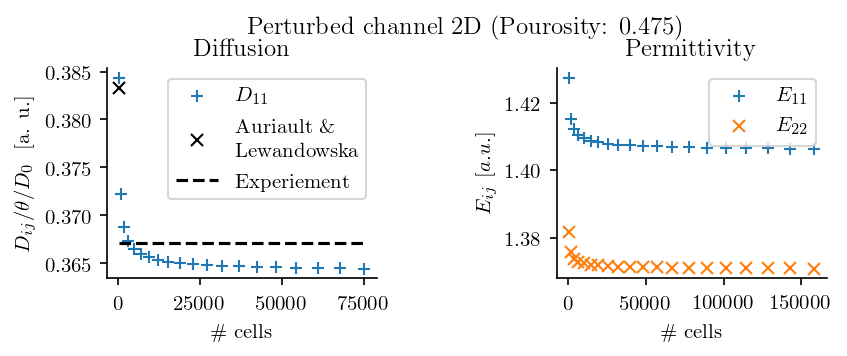

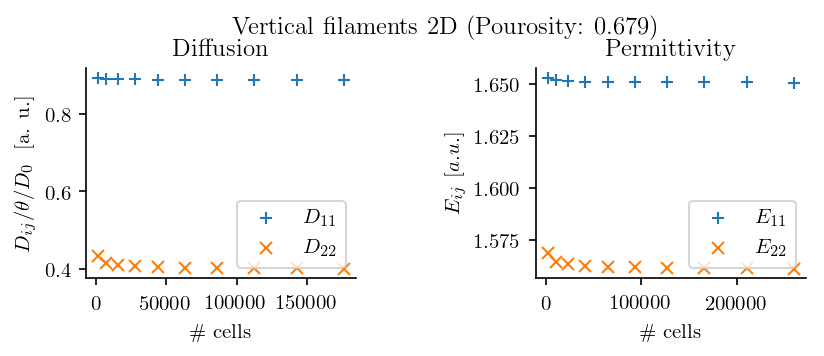

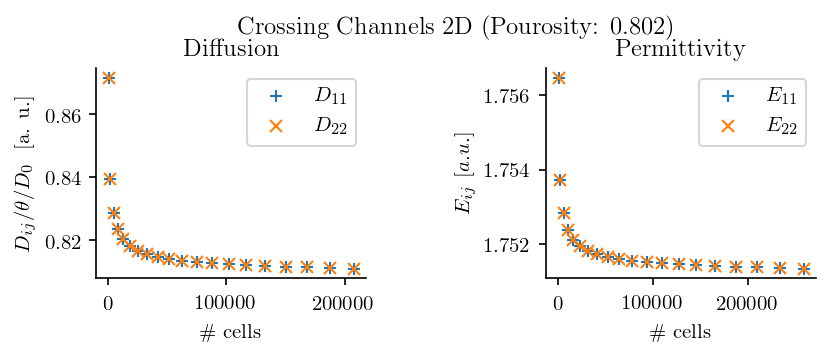

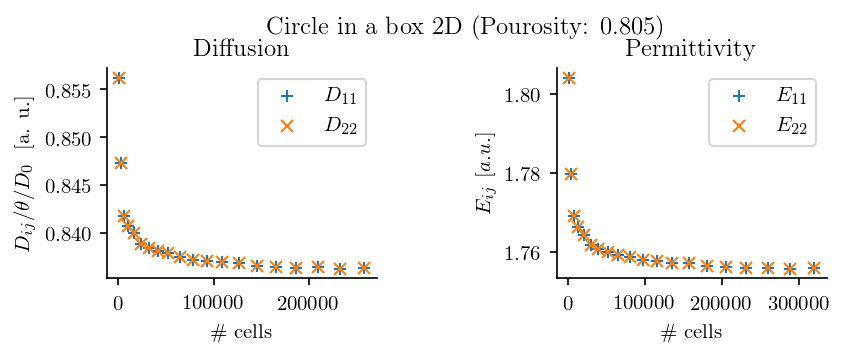

In [6]:
# ANALYZE ACCURACY OF TENSOR ENTRIES DEPENDENT ON RESOLUTION OF GRID
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]

gm = 'box_in__box_2d'
fig_1_1 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_1, pos1, pos2,res_1, y_data_1, res_2, y_data_2,
                                              title='Box in a box 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'four_boxes_in_a_box_2d'
fig_1_2 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        if r[3] % 36 == 0:
            pourosity = r[8]
            res_1.append(r[3]*r[3]*2*pourosity)
            res_2.append(r[3]*r[3]*2)
            D = r[6]
            P = r[7]
            y_data_1[0].append(D[0,0])
            y_data_1[1].append(D[1,1])
            y_data_2[0].append(P[0,0])
            y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_2, pos1, pos2,res_1, y_data_1, res_2, y_data_2,
                                              title='Four Boxes in a box 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'diagonal_box_in_box_2d'
fig_1_3 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_3, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Diagonal box in a box 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'straight_channel_2d'
fig_1_4 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        #res_1.append(r[3]*2*pourosity)
        #res_2.append(r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_4, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Straight channel 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')',
                                              options=['plot_only_11_diffusion', 'plot_permittivity_diagonals', 
                                                       'plot_straight_channel_theory'])
plt.show()

gm = 'diagonal_channels_2d'
fig_1_5 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[],[],[]]
y_data_2 = [[],[],[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[0,1])
        y_data_1[2].append(D[1,0])
        y_data_1[3].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[0,1])
        y_data_2[2].append(P[1,0])
        y_data_2[3].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_5, pos1, pos2,res_1, y_data_1, res_2, y_data_2,
                                              title='Diagonal channels 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')', 
                                              options=['plot_all_components', 'plot_diagonal_channel_theory'])
plt.show()

gm = 'perturbed_channel_2d'
fig_1_5 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        res_x = r[3]
        res_y = r[4]
        pourosity = r[8]
        res_1.append(res_x*res_y*2*pourosity)
        res_2.append(res_x*res_y*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_5, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Perturbed channel 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')', 
                                              options=['plot_only_11_diffusion', 'compare_auriault', 'plot_permittivity_diagonals'])
plt.show()

gm = 'vertical_filaments_2d'
fig_1_6 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_6, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Vertical filaments 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'crossing_channels_2d'
fig_1_7 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_7, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Crossing Channels 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'circle_in_a_box_2d'
fig_1_8 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_8, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Circle in a box 2D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

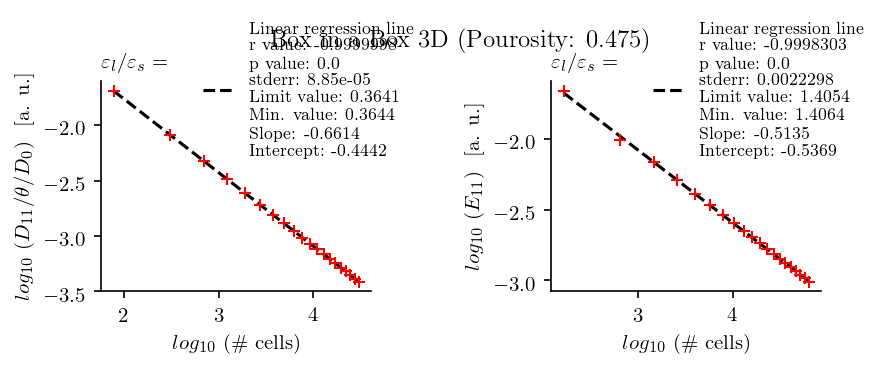

In [457]:
# ANALYZE ACCURACY OF TENSOR ENTRIES DEPENDENT ON RESOLUTION OF GRID
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]

gm = 'perturbed_channel_2d'
fig_1_11 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = []
y_data_2 = []
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        res_1.append(r[3]*r[3]*2*pourosity)
        res_2.append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1.append(D[0,0])
       
        y_data_2.append(P[0,0])



pf.plot_correction_tensor_regression_line(fig_1_11, pos1, res_1, y_data_1, title='Diffusion')
pf.plot_correction_tensor_regression_line(fig_1_11, pos2, res_2, y_data_2, title='Permittivity')
fig_1_11.suptitle('Box in a Box 3D' + ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

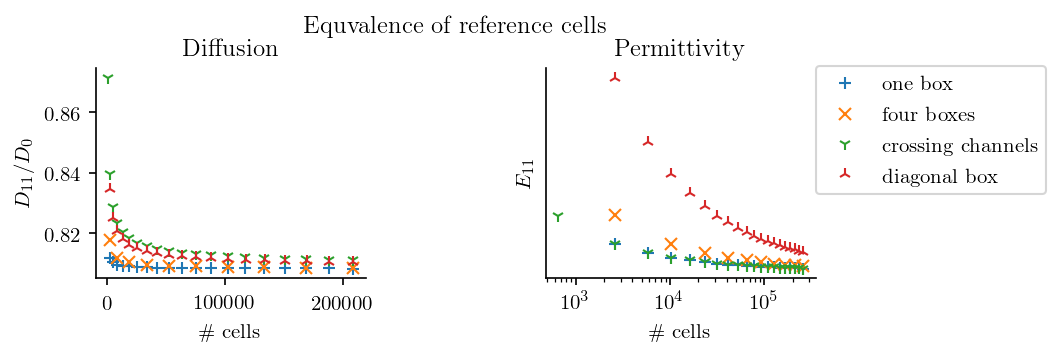

'\nInterpretation:\nIf the matrix is invariant to rotations of 90 deg around the coordinate axis then the correction tensors have diagonal \nform and the correction tensors are invariant to any rotation of the reference cell (as long as it is a reference cell)\n->isotropic\n'

In [441]:
# COMPARE TWO SCALES OF REFERENCE CELLS: ONE BOX AND FOUR BOXES

importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]

fig_2 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = [[],[], [], []]
res_2 = [[],[], [], []]
y_data_1 = [[],[], [], []]
y_data_2 = [[],[], [], []]

gm = 'box_in__box_2d'
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution': 
        pourosity = r[8]
        res_1[0].append(r[3]*r[3]*2*pourosity)
        res_2[0].append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[0,0])        
        y_data_2[0].append(P[0,0])

gm = 'four_boxes_in_a_box_2d'
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution': 
        if r[3] % 36 == 0:
            pourosity = r[8]
            res_1[1].append(r[3]*r[3]*2*pourosity)
            res_2[1].append(r[3]*r[3]*2)
            D = r[6]
            P = r[7]
            y_data_1[1].append(D[0,0])        
            y_data_2[1].append(P[0,0])

gm = 'crossing_channels_2d'
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution': 
        
        pourosity = r[8]
        res_1[2].append(r[3]*r[3]*2*pourosity)
        res_2[2].append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[2].append(D[0,0])        
        y_data_2[2].append(P[0,0])

gm = 'diagonal_box_in_box_2d'
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution': 
        
        pourosity = r[8]
        res_1[3].append(r[3]*r[3]*2*pourosity)
        res_2[3].append(r[3]*r[3]*2)
        D = r[6]
        P = r[7]
        y_data_1[3].append(D[0,0])        
        y_data_2[3].append(P[0,0])

pf.plot_box_cell_is_dimensionless(fig_2, pos1, pos2, res_1, y_data_1, res_2, y_data_2, title='Equvalence of reference cells')

plt.show()
"""
Interpretation:
If the matrix is invariant to rotations of 90 deg around the coordinate axis then the correction tensors have diagonal 
form and the correction tensors are invariant to any rotation of the reference cell (as long as it is a reference cell)
->isotropic
"""



/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


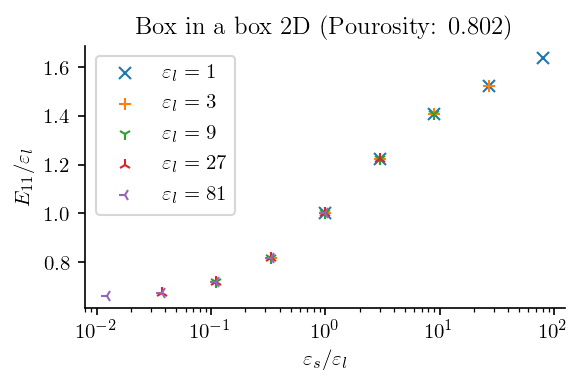

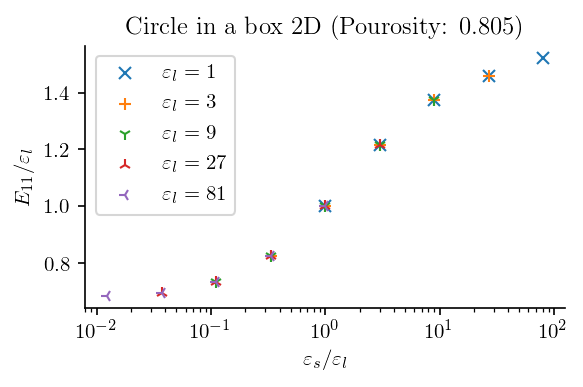

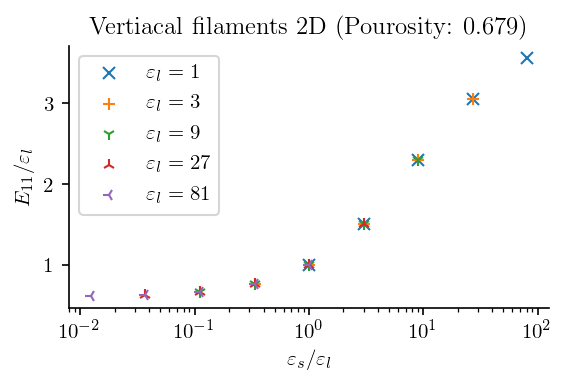

/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars
/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: divide by zero encountered in double_scalars


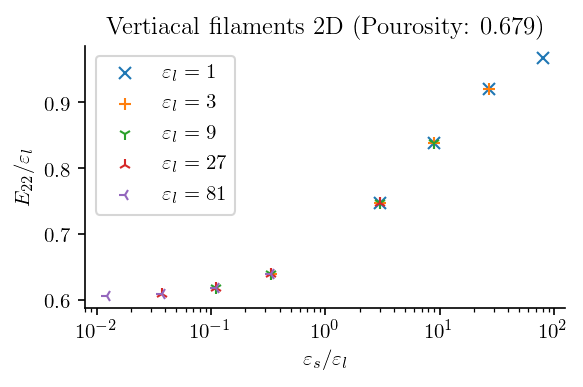

'\nthe nomalized permittivity P/eps_l depends only on the fraction alpha = eps_s / eps_l\n'

In [4]:
# TEST IS PERMITTIVITY IS DIMENSIONLESS

importlib.reload(pf)

pos = [0.1, 0.1, 0.8, 0.7]


fig_3_1 = plt.figure(figsize=(4.,  2.5), dpi=150)
x_data = [[],[],[],[],[]]
y_data = [[],[],[],[],[]]

gm = 'box_in__box_2d'
for r in results:
    if r[0] == gm and r[-1]=='scale_independence_permittivity':
        eps_l = r[1]
        eps_s = r[2]
        pourosity = r[8]
        P = r[7]

        # p_11 = ((P[0,0] - eps_s)/(eps_l - eps_s))
        p_11 = ((P[0,0])/(eps_l))
        if eps_l == 1.:
            x_data[0].append(eps_s/eps_l)
            y_data[0].append(p_11)
        elif eps_l == 3.:
            x_data[1].append(eps_s/eps_l)
            y_data[1].append(p_11)
        elif eps_l == 9.:
            x_data[2].append(eps_s/eps_l)
            y_data[2].append(p_11)
        elif eps_l == 27.:
            x_data[3].append(eps_s/eps_l)
            y_data[3].append(p_11)
        elif eps_l == 81.:
            x_data[4].append(eps_s/eps_l)
            y_data[4].append(p_11)

pf.plot_scale_independence_permittivity(fig_3_1, pos, x_data, y_data,
                                       title='Box in a box 2D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()


fig_3_2 = plt.figure(figsize=(4.,  2.5), dpi=150)
x_data = [[],[],[],[],[]]
y_data = [[],[],[],[],[]]

gm = 'circle_in_a_box_2d'
for r in results:
    if r[0] == gm and r[-1]=='scale_independence_permittivity':
        eps_l = r[1]
        eps_s = r[2]
        pourosity = r[8]
        P = r[7]
        # p_11 = ((P[0,0] - eps_s)/(eps_l - eps_s))
        p_11 = ((P[0,0])/(eps_l))
        if eps_l == 1.:
            x_data[0].append(eps_s/eps_l)
            y_data[0].append(p_11)
        elif eps_l == 3.:
            x_data[1].append(eps_s/eps_l)
            y_data[1].append(p_11)
        elif eps_l == 9.:
            x_data[2].append(eps_s/eps_l)
            y_data[2].append(p_11)
        elif eps_l == 27.:
            x_data[3].append(eps_s/eps_l)
            y_data[3].append(p_11)
        elif eps_l == 81.:
            x_data[4].append(eps_s/eps_l)
            y_data[4].append(p_11)

pf.plot_scale_independence_permittivity(fig_3_2, pos, x_data, y_data,
                                       title='Circle in a box 2D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

fig_3_3 = plt.figure(figsize=(4.,  2.5), dpi=150)
x_data = [[],[],[],[],[]]
y_data = [[],[],[],[],[]]

gm = 'vertical_filaments_2d'
for r in results:
    if r[0] == gm and r[-1]=='scale_independence_permittivity':
        eps_l = r[1]
        eps_s = r[2]
        pourosity = r[8]
        P = r[7]
        # p_11 = ((P[0,0] - eps_s)/(eps_l - eps_s))
        p_11 = ((P[0,0])/(eps_l))
        if eps_l == 1.:
            x_data[0].append(eps_s/eps_l)
            y_data[0].append(p_11)
        elif eps_l == 3.:
            x_data[1].append(eps_s/eps_l)
            y_data[1].append(p_11)
        elif eps_l == 9.:
            x_data[2].append(eps_s/eps_l)
            y_data[2].append(p_11)
        elif eps_l == 27.:
            x_data[3].append(eps_s/eps_l)
            y_data[3].append(p_11)
        elif eps_l == 81.:
            x_data[4].append(eps_s/eps_l)
            y_data[4].append(p_11)

pf.plot_scale_independence_permittivity(fig_3_3, pos, x_data, y_data,
                                       title='Vertiacal filaments 2D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

fig_3_4 = plt.figure(figsize=(4.,  2.5), dpi=150)
x_data = [[],[],[],[],[]]
y_data = [[],[],[],[],[]]

gm = 'vertical_filaments_2d'
for r in results:
    if r[0] == gm and r[-1]=='scale_independence_permittivity':
        eps_l = r[1]
        eps_s = r[2]
        pourosity = r[8]
        P = r[7]
        p_11 = ((P[0,0] - eps_s)/(eps_l - eps_s))
        #p_11 = ((P[1,1])/(eps_l))
        if eps_l == 1.:
            x_data[0].append(eps_s/eps_l)
            y_data[0].append(p_11)
        elif eps_l == 3.:
            x_data[1].append(eps_s/eps_l)
            y_data[1].append(p_11)
        elif eps_l == 9.:
            x_data[2].append(eps_s/eps_l)
            y_data[2].append(p_11)
        elif eps_l == 27.:
            x_data[3].append(eps_s/eps_l)
            y_data[3].append(p_11)
        elif eps_l == 81.:
            x_data[4].append(eps_s/eps_l)
            y_data[4].append(p_11)

pf.plot_scale_independence_permittivity(fig_3_4, pos, x_data, y_data, component='22',
                                       title='Vertiacal filaments 2D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()



"""
the nomalized permittivity P/eps_l depends only on the fraction alpha = eps_s / eps_l
"""

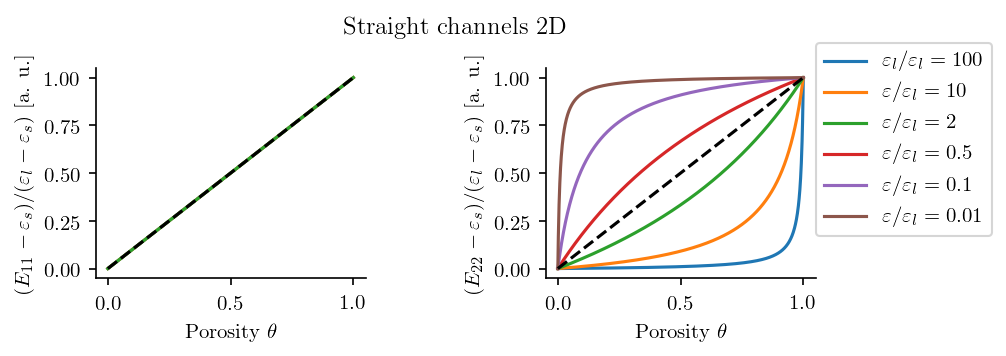

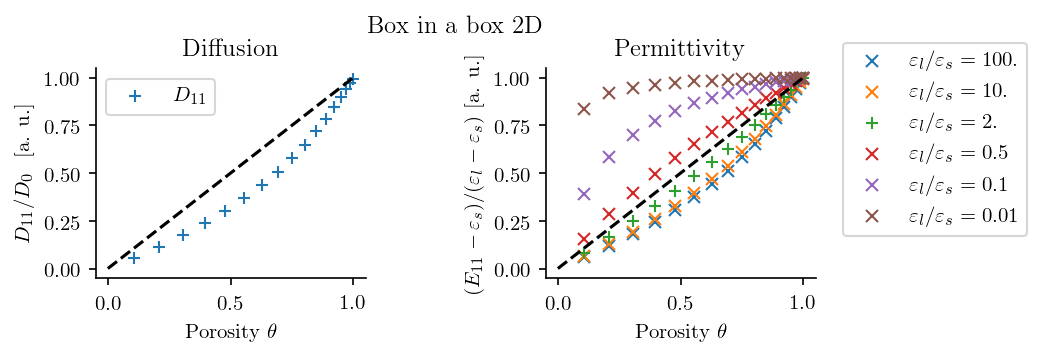

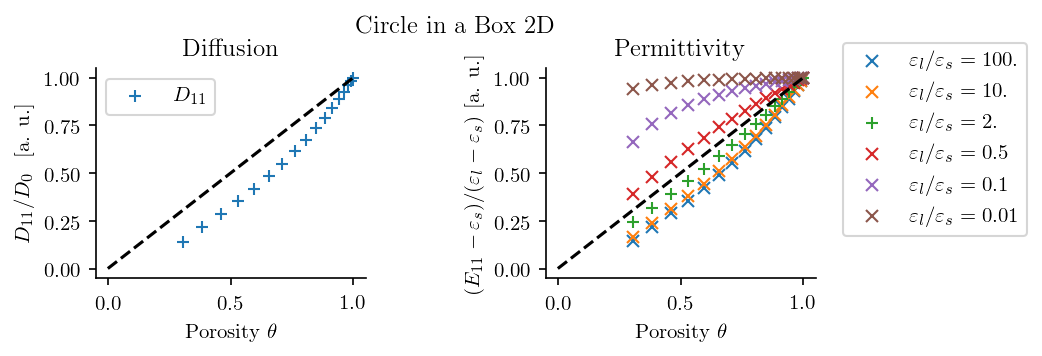

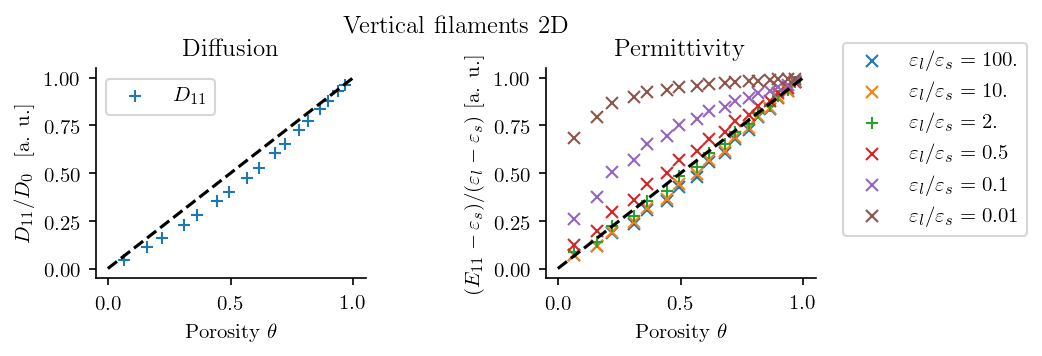

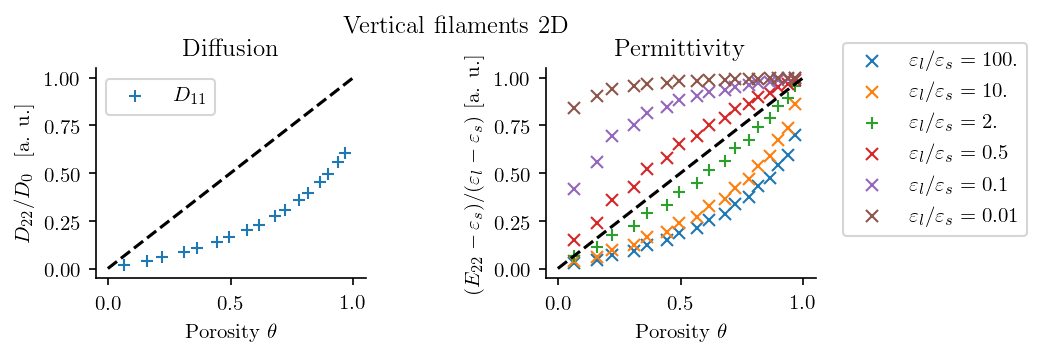

'\nInterpretation: Pourosity alone is not sufficient to explain the change in diffusion and permittivity\n\nThere is an asymmetry between changes in small eps_l and large eps_l this is maybe the case because liquid is more \nconnected over boundaries than the solid phase in the plots below\nConnected domains are more similar to a channel\nDisconnected domains are more similar to e22 of capacitor where domains are not connected\n\nDiffusion vs pourosity might be the limit curve of high eps_l\n\n'

In [460]:
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]

fig_4_0 = plt.figure(figsize=(6.,  2.), dpi=150)
pf.plot_pourosity_vs_correction_tensors_cap(fig_4_0, pos1, pos2)
plt.show()

fig_4_1 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'box_in__box_2d'
for r in results:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_1, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Box in a box 2D')
plt.show()

fig_4_2 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'circle_in_a_box_2d'
for r in results:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_2, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Circle in a Box 2D')
plt.show()


fig_4_3 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'vertical_filaments_2d'
for r in results:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_3, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Vertical filaments 2D')
plt.show()

fig_4_4 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'vertical_filaments_2d'
for r in results:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[1,1]*pourosity)
            y_data_2[0].append((E[1,1]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[1,1]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[1,1]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[1,1]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[1,1]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[1,1]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_4, pos1, pos2, x_data, y_data_1, x_data, y_data_2,
                                        title='Vertical filaments 2D',
                                        component='22')
plt.show()

"""
Interpretation: Pourosity alone is not sufficient to explain the change in diffusion and permittivity

There is an asymmetry between changes in small eps_l and large eps_l this is maybe the case because liquid is more 
connected over boundaries than the solid phase in the plots below
Connected domains are more similar to a channel
Disconnected domains are more similar to e22 of capacitor where domains are not connected

Diffusion vs pourosity might be the limit curve of high eps_l

"""

0.04687499999999794
8
0.04687500000001652
16
0.04687500000004871
24
0.04687499999986784
32


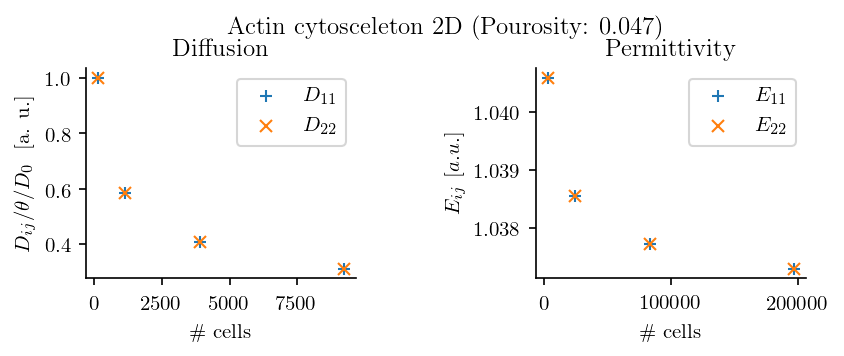

0.8749999999999916
0.8750000000000682
0.8750000000003234
0.8749999999994543


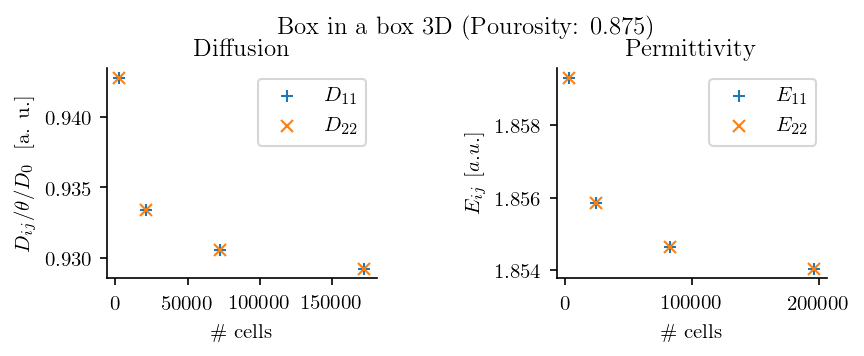

0.749999999999983
0.7500000000001364
0.7500000000006467
0.7499999999989087


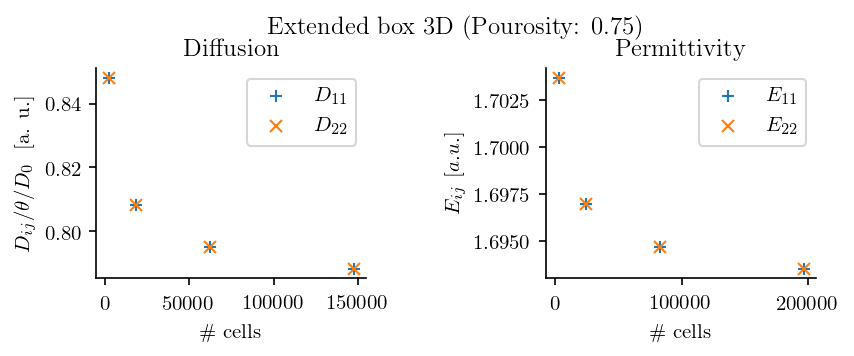

0.8437499999999895
0.8437500000000853
0.8437500000004042
0.8437499999993179


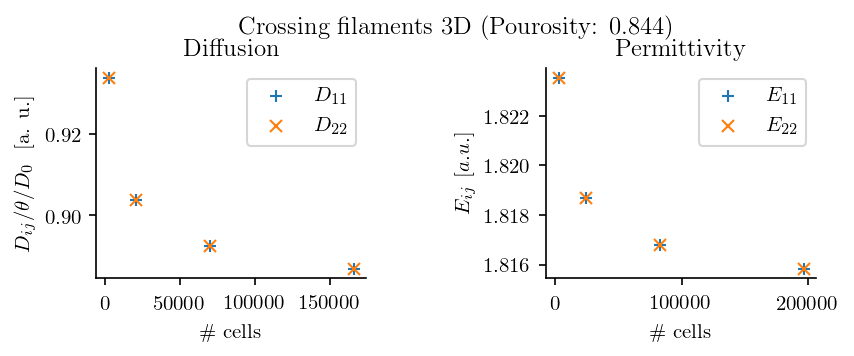

In [262]:
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]

gm = 'actin_cytosceleton_3d'
fig_1_9 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results3d:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution' and r[8] < 0.8:
        
        pourosity = r[8]
        print(pourosity)
        print(r[3])
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[(0,0)])
        y_data_1[1].append(D[(1,1)])
        y_data_2[0].append(P[(0,0)])
        y_data_2[1].append(P[(1,1)])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_9, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Actin cytosceleton 2D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()


gm = 'box_in_a_box_3d'
fig_1_10 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results3d:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        if pourosity < 0.9:
            print(pourosity)

            res_1.append(r[3]*r[3]*r[3]*6*pourosity)
            res_2.append(r[3]*r[3]*r[3]*6)
            D = r[6]
            P = r[7]
            y_data_1[0].append(D[(0,0)])
            y_data_1[1].append(D[(1,1)])
            y_data_2[0].append(P[(0,0)])
            y_data_2[1].append(P[(1,1)])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_10, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Box in a box 3D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'extended_box_3d'
fig_1_10 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results3d:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[(0,0)])
        y_data_1[1].append(D[(1,1)])
        y_data_2[0].append(P[(0,0)])
        y_data_2[1].append(P[(1,1)])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_10, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Extended box 3D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

gm = 'crossing_filaments_3d'
fig_1_11 = plt.figure(figsize=(6.,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results3d:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':
        pourosity = r[8]
        print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        y_data_1[0].append(D[(0,0)])
        y_data_1[1].append(D[(1,1)])
        y_data_2[0].append(P[(0,0)])
        y_data_2[1].append(P[(1,1)])
pf.plot_correction_tensors_vs_number_of_cells(fig_1_11, pos1, pos2,res_1, y_data_1, res_2, y_data_2, 
                                              title='Crossing filaments 3D'+' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

In [385]:
# ROUND GEOMETRY VS RECTANGULAR

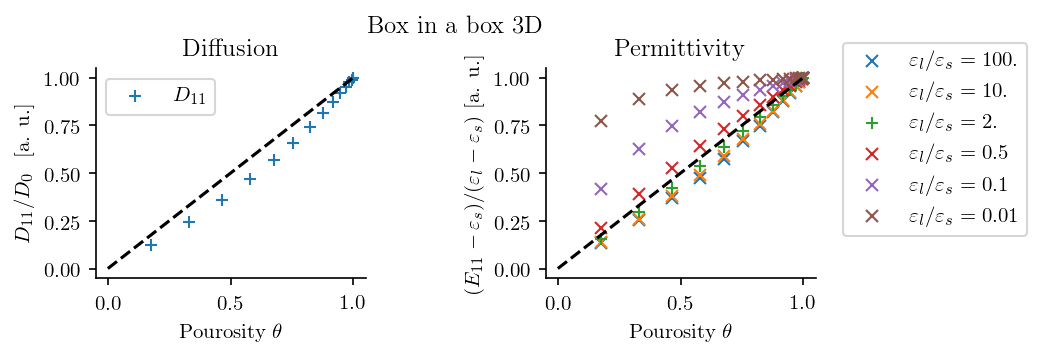

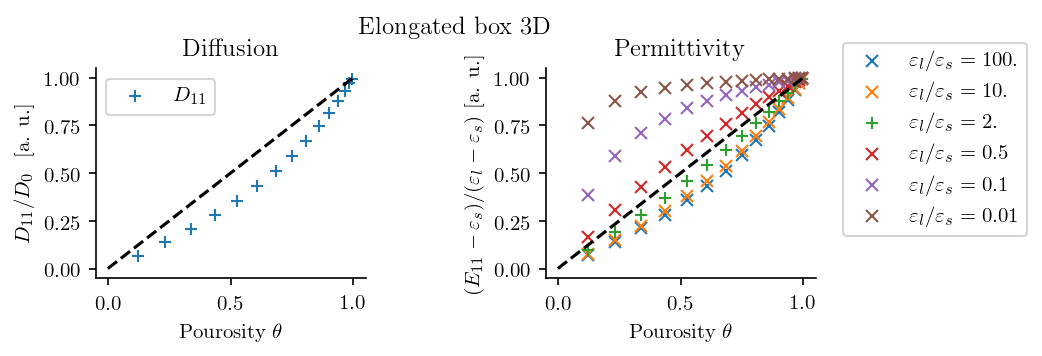

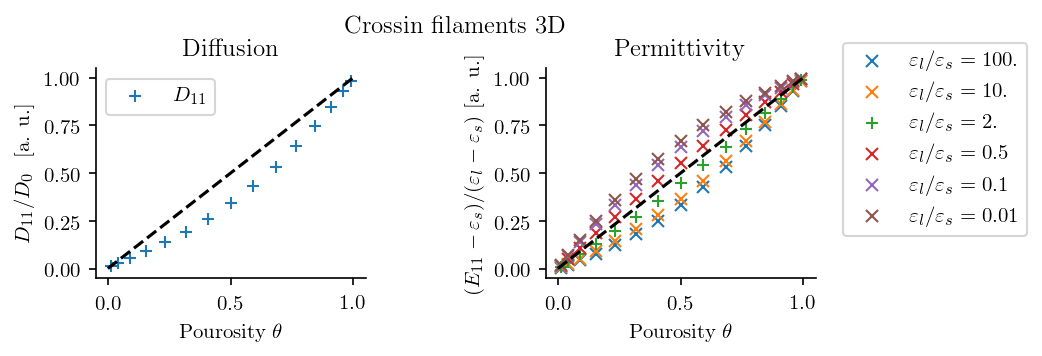

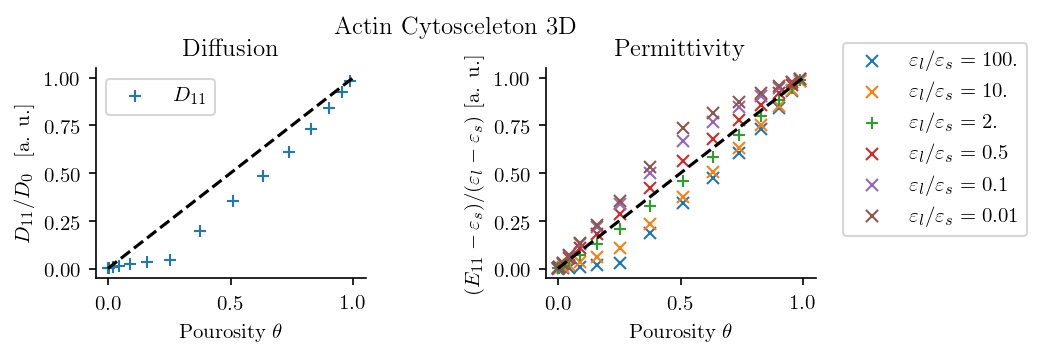

In [46]:
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]


fig_4_5 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'box_in_a_box_3d'
for r in results3d:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_5, pos1, pos2, x_data, y_data_1, x_data, y_data_2, title='Box in a box 3D')
plt.show()

fig_4_6 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'extended_box_3d'
for r in results3d:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_6, pos1, pos2, x_data, y_data_1, x_data, y_data_2,
                                        title='Elongated box 3D')
plt.show()

fig_4_7 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'crossing_filaments_3d'
for r in results3d:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_7, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 'Crossin filaments 3D')
plt.show()

fig_4_8 = plt.figure(figsize=(6.,  2.), dpi=150)
x_data = [[],[],[],[],[],[]]
y_data_1 = [[],[],[],[],[],[]]
y_data_2 = [[],[],[],[],[],[]] 
gm = 'actin_cytosceleton_3d'
for r in results3d:
    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        pourosity = r[8]
        eps_l = r[1]
        eps_s = r[2]
        D = r[6]
        E = r[7]
        if eps_l == 2.:
            
            x_data[0].append(pourosity)
            y_data_1[0].append(D[0,0]*pourosity)
            y_data_2[0].append((E[0,0]-eps_s)/(eps_l-eps_s))
            
        elif eps_l == 10.:
            x_data[1].append(pourosity)
            y_data_2[1].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 100.:
            x_data[2].append(pourosity)
            y_data_2[2].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.1:
            x_data[3].append(pourosity)
            y_data_2[3].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.01:
            x_data[4].append(pourosity)
            y_data_2[4].append((E[0,0]-eps_s)/(eps_l-eps_s))
        elif eps_l == 0.5:
            x_data[5].append(pourosity)
            y_data_2[5].append((E[0,0]-eps_s)/(eps_l-eps_s))

pf.plot_pourosity_vs_correction_tensors(fig_4_8, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Actin Cytosceleton 3D')
plt.show()


In [83]:
lr.rvalue

-0.9973460713371517

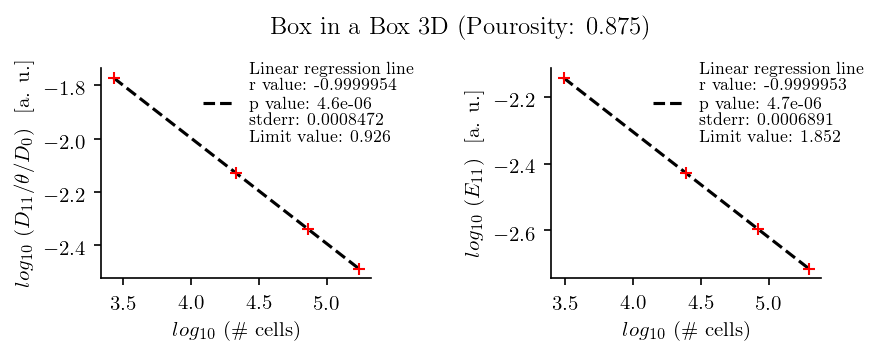

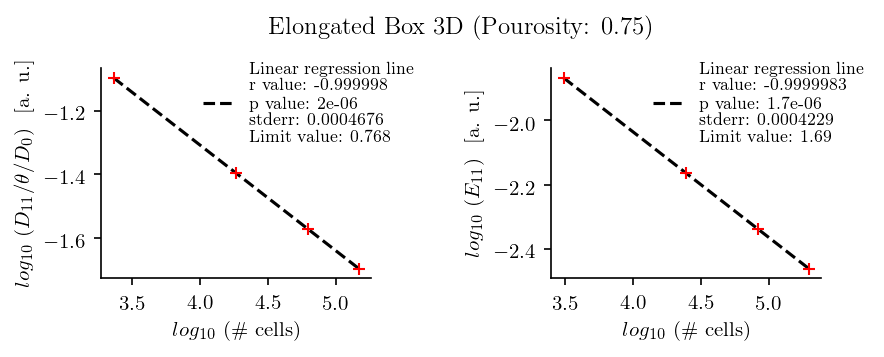

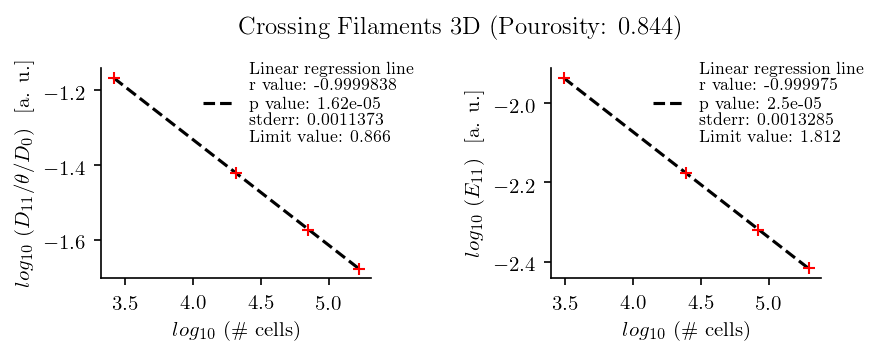

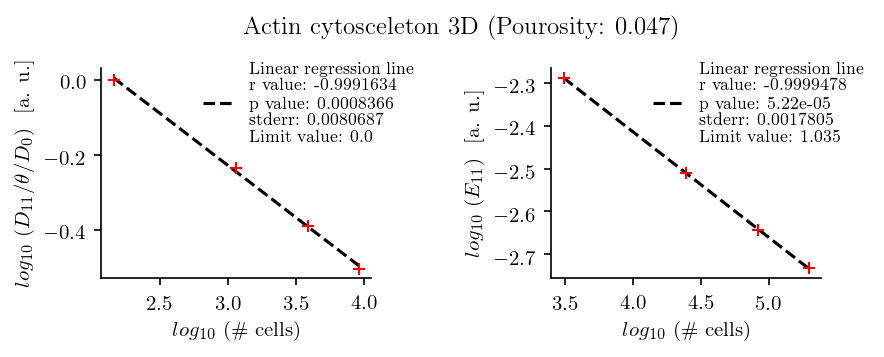

'\nthis type of convergence may be due to the rectangular mesh\n'

In [265]:
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]



gm = 'box_in_a_box_3d'
res_1 = []
res_2 = []
y_data_1 = []
y_data_2 = []
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution' and r[8]<0.9:        
        pourosity = r[8]
        #print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        
        y_data_1.append(D[(0,0)])

        y_data_2.append(P[(0,0)])

fig_5_1 = plt.figure(figsize=(6.,  2.), dpi=150)
pf.plot_correction_tensor_regression_line(fig_5_1, pos1, res_1, y_data_1, title='Diffusion')
pf.plot_correction_tensor_regression_line(fig_5_1, pos2, res_2, y_data_2, title='Permittivity')
fig_5_1.suptitle('Box in a Box 3D' + ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()



gm = 'extended_box_3d'
res_1 = []
res_2 = []
y_data_1 = []
y_data_2 = []
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution':        
        pourosity = r[8]
        #print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        
        y_data_1.append(D[(0,0)])

        y_data_2.append(P[(0,0)])

fig_5_2 = plt.figure(figsize=(6.,  2.), dpi=150)
pf.plot_correction_tensor_regression_line(fig_5_2, pos1, res_1, y_data_1, title='Diffusion')
pf.plot_correction_tensor_regression_line(fig_5_2, pos2, res_2, y_data_2, title='Permittivity')
fig_5_2.suptitle('Elongated Box 3D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()


gm = 'crossing_filaments_3d'
res_1 = []
res_2 = []
y_data_1 = []
y_data_2 = []
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution' and r[8]:        
        pourosity = r[8]
        #print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        
        y_data_1.append(D[(0,0)])

        y_data_2.append(P[(0,0)])

fig_5_3 = plt.figure(figsize=(6.,  2.), dpi=150)
pf.plot_correction_tensor_regression_line(fig_5_3, pos1, res_1, y_data_1, title='Diffusion')
pf.plot_correction_tensor_regression_line(fig_5_3, pos2, res_2, y_data_2, title='Permittivity')
fig_5_3.suptitle('Crossing Filaments 3D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()


gm = 'actin_cytosceleton_3d'
res_1 = []
res_2 = []
y_data_1 = []
y_data_2 = []
for r in results:
    if r[0] == gm and r[-1]=='accuracy_vs_resolution' and r[8] < 0.3:        
        pourosity = r[8]
        #print(pourosity)
        res_1.append(r[3]*r[3]*r[3]*6*pourosity)
        res_2.append(r[3]*r[3]*r[3]*6)
        D = r[6]
        P = r[7]
        
        y_data_1.append(D[(0,0)])

        y_data_2.append(P[(0,0)])

fig_5_4 = plt.figure(figsize=(6.,  2.), dpi=150)
pf.plot_correction_tensor_regression_line(fig_5_4, pos1, res_1, y_data_1, title='Diffusion')
pf.plot_correction_tensor_regression_line(fig_5_4, pos2, res_2, y_data_2, title='Permittivity')
fig_5_4.suptitle('Actin cytosceleton 3D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
plt.show()

"""
this type of convergence may be due to the rectangular mesh
"""

In [452]:
importlib.reload(pf)

y_size = 0.1

pos1   = [0.35, 0.8, 0.3, y_size]
pos2_1 = [0.1, 0.55, 0.3, y_size]
pos2_2 = [0.6, 0.55, 0.3, y_size]
pos2_3 = [0.1, 0.3, 0.3, y_size]
pos2_4 = [0.6, 0.3, 0.3, y_size]
pos2_5 = [0.1, 0.05, 0.3, y_size]
pos2_6 = [0.6, 0.05, 0.3, y_size]

results3dfinal = pickle.load(open('./../results/homogenization_results_3d_vs_pour.pcl', 'rb'))

geometries3d = ['box_in_a_box_3d',  'extended_box_3d', 'crossing_filaments_3d', 'actin_cytosceleton_3d']

pourosities = {'box_in_a_box_3d':[],  'extended_box_3d':[], 'crossing_filaments_3d':[], 'actin_cytosceleton_3d':[]}

plot_data = {gm: {'x_data':[[],[],[],[],[],[]], 'y_data_1':[[],[],[],[],[],[]], 'y_data_2':[[],[],[],[],[],[]]} 
              for gm in geometries3d}

i = 0
for r in results3dfinal:
    gm = r[0]
    pourosity = r[8]
    
    if np.all(np.abs(np.array(pourosities[gm]) - pourosity) > 0.00001):
        pourosities[gm].append(pourosity)
    i = i+1
#print(i)

print(pourosities)
        
for gm in geometries3d :
    for pourosity in pourosities[gm]:
        res_1 = []
        res_2_1 = []
        res_2_2 = []
        res_2_3 = []
        res_2_4 = []
        res_2_5 = []
        res_2_6 = []
        y_data_1 = []
        y_data_2_1 = []
        y_data_2_2 = []
        y_data_2_3 = []
        y_data_2_4 = []
        y_data_2_5 = []
        y_data_2_6 = []        
        for r in results3dfinal:
            if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors' and np.isclose(r[8], pourosity):        
                # pourosity = r[8]
                res_1.append(r[3]*r[3]*r[3]*6*pourosity)
                
                D = r[6]
                P = r[7]
                eps_l = r[1]
                y_data_1.append(D[(0,0)])
                if eps_l == 100.:
                    y_data_2_1.append(P[(0,0)])
                    res_2_1.append(r[3]*r[3]*r[3]*6)
                elif eps_l == 10.:
                    y_data_2_2.append(P[(0,0)])
                    res_2_2.append(r[3]*r[3]*r[3]*6)
                elif eps_l == 2.:
                    y_data_2_3.append(P[(0,0)])
                    res_2_3.append(r[3]*r[3]*r[3]*6)
                elif eps_l == .5:
                    y_data_2_4.append(P[(0,0)])
                    res_2_4.append(r[3]*r[3]*r[3]*6)
                elif eps_l == .1:
                    y_data_2_5.append(P[(0,0)])
                    res_2_5.append(r[3]*r[3]*r[3]*6)
                elif eps_l == .01:
                    y_data_2_6.append(P[(0,0)])
                    res_2_6.append(r[3]*r[3]*r[3]*6)
        # print(y_data_1, y_data_2)
        fig_tmp = plt.figure(figsize=(6.,  8.), dpi=150)
        lim_d = pf.plot_correction_tensor_regression_line(fig_tmp, pos1, res_1, y_data_1, title='Diffusion')
        lim_p_100 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_1, res_2_1, y_data_2_1, 
                                                              title='Permittivity', eps_l=100.)
        lim_p_10 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_2, res_2_2, y_data_2_2, 
                                                             title='Permittivity', eps_l=10.)
        lim_p_2 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_3, res_2_3, y_data_2_3,
                                                            title='Permittivity', eps_l=2.)
        lim_p_05 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_4, res_2_4, y_data_2_4,
                                                             title='Permittivity', eps_l=0.5)
        lim_p_01 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_5, res_2_5, y_data_2_5, 
                                                             title='Permittivity', eps_l=0.1)
        lim_p_001 = pf.plot_correction_tensor_regression_line(fig_tmp, pos2_6, res_2_6, y_data_2_6,
                                                              title='Permittivity', eps_l=0.01)
        fig_tmp.suptitle('Actin cytosceleton 3D'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
        fig_tmp.savefig('./../results/reg_lines_3d/' + gm + '_'+str(np.round(pourosity,3))+'.png')
        plt.close()
        
        
        plot_data[gm]['x_data'][0].append(pourosity)
        plot_data[gm]['x_data'][1].append(pourosity)
        plot_data[gm]['x_data'][2].append(pourosity)
        plot_data[gm]['x_data'][3].append(pourosity)
        plot_data[gm]['x_data'][4].append(pourosity)
        plot_data[gm]['x_data'][5].append(pourosity)
        plot_data[gm]['y_data_1'][0].append(lim_d*pourosity)
        plot_data[gm]['y_data_2'][2].append((lim_p_100-1.)/(100.-1.))
        plot_data[gm]['y_data_2'][1].append((lim_p_10-1.)/(10.-1.))
        plot_data[gm]['y_data_2'][0].append((lim_p_2-1.)/(2.-1.))
        plot_data[gm]['y_data_2'][5].append((lim_p_05-1.)/(0.5-1.))
        plot_data[gm]['y_data_2'][3].append((lim_p_01-1.)/(0.1-1.))
        plot_data[gm]['y_data_2'][4].append((lim_p_001-1.)/(0.01-1.))



{'box_in_a_box_3d': [0.984374999999999, 0.8749999999999916, 0.5781249999999712, 0.9920000000000011, 0.9360000000000089, 0.7840000000000301, 0.4880000000000633, 0.9953703703703689, 0.962962962962951, 0.7037037037036079, 0.42129629629622595], 'extended_box_3d': [0.9374999999999959, 0.749999999999983, 0.43749999999997236, 0.9600000000000056, 0.8400000000000223, 0.6400000000000503, 0.36000000000003757, 0.9722222222222132, 0.888888888888853, 0.5555555555554371, 0.30555555555552677], 'crossing_filaments_3d': [0.8437499999999895, 0.49999999999996597, 0.1562499999999931, 0.8960000000000146, 0.6480000000000491, 0.35200000000003595, 0.10400000000000989, 0.925925925925902, 0.7407407407406569, 0.25925925925923443, 0.07407407407406519], 'actin_cytosceleton_3d': [0.8281249999999883, 0.37499999999997874, 0.04687499999999794, 0.8880000000000157, 0.584000000000058, 0.19200000000001466, 0.024000000000002138, 0.9212962962962709, 0.7037037037036079, 0.11111111111109526, 0.013888888888887084]}


In [451]:
np.round(pourosity,3)

0.352

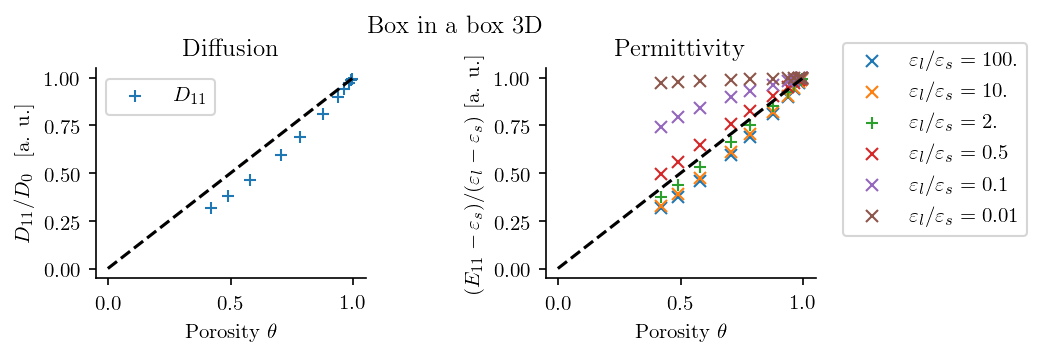

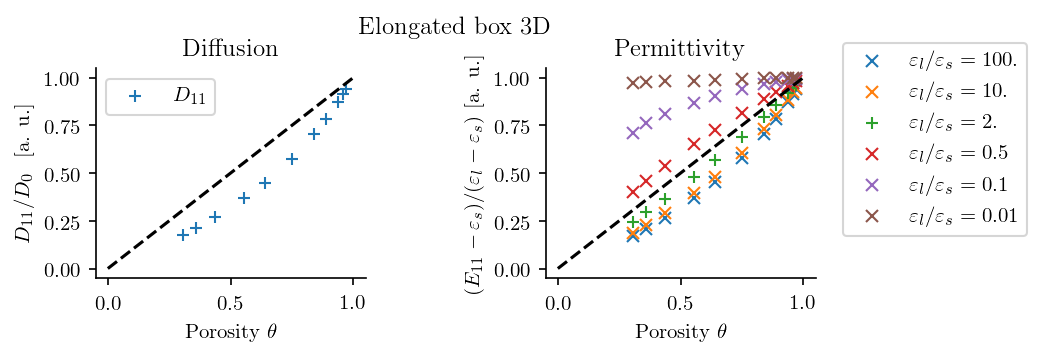

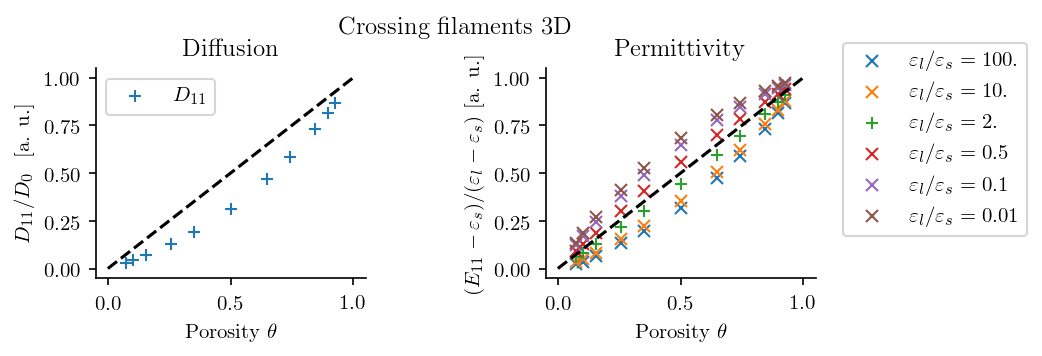

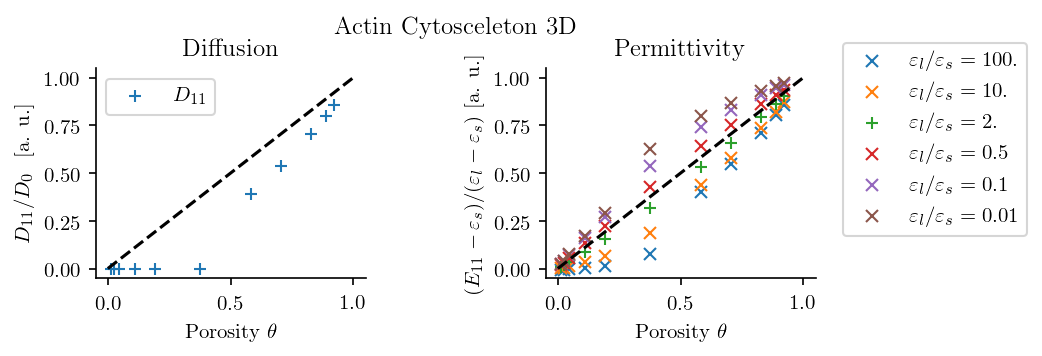

In [448]:
importlib.reload(pf)
pos1 = [0.1, 0.1, 0.3, 0.7]
pos2 = [0.6, 0.1, 0.3, 0.7]


fig_5_1 = plt.figure(figsize=(6.,  2.), dpi=150)

gm = 'box_in_a_box_3d'
x_data = plot_data[gm]['x_data']
y_data_1 = plot_data[gm]['y_data_1']
y_data_2 = plot_data[gm]['y_data_2']

pf.plot_pourosity_vs_correction_tensors(fig_5_1, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Box in a box 3D')
plt.show()

fig_5_2 = plt.figure(figsize=(6.,  2.), dpi=150)

gm = 'extended_box_3d'
x_data = plot_data[gm]['x_data']
y_data_1 = plot_data[gm]['y_data_1']
y_data_2 = plot_data[gm]['y_data_2']

pf.plot_pourosity_vs_correction_tensors(fig_5_2, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Elongated box 3D')
plt.show()

fig_5_3 = plt.figure(figsize=(6.,  2.), dpi=150)

gm = 'crossing_filaments_3d'
x_data = plot_data[gm]['x_data']
y_data_1 = plot_data[gm]['y_data_1']
y_data_2 = plot_data[gm]['y_data_2']

pf.plot_pourosity_vs_correction_tensors(fig_5_3, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Crossing filaments 3D')
plt.show()


fig_5_4 = plt.figure(figsize=(6.,  2.), dpi=150)

gm = 'actin_cytosceleton_3d'
x_data = plot_data[gm]['x_data']
y_data_1 = plot_data[gm]['y_data_1']
y_data_2 = plot_data[gm]['y_data_2']

pf.plot_pourosity_vs_correction_tensors(fig_5_4, pos1, pos2, x_data, y_data_1, x_data, y_data_2, 
                                        title='Actin Cytosceleton 3D')
plt.show()

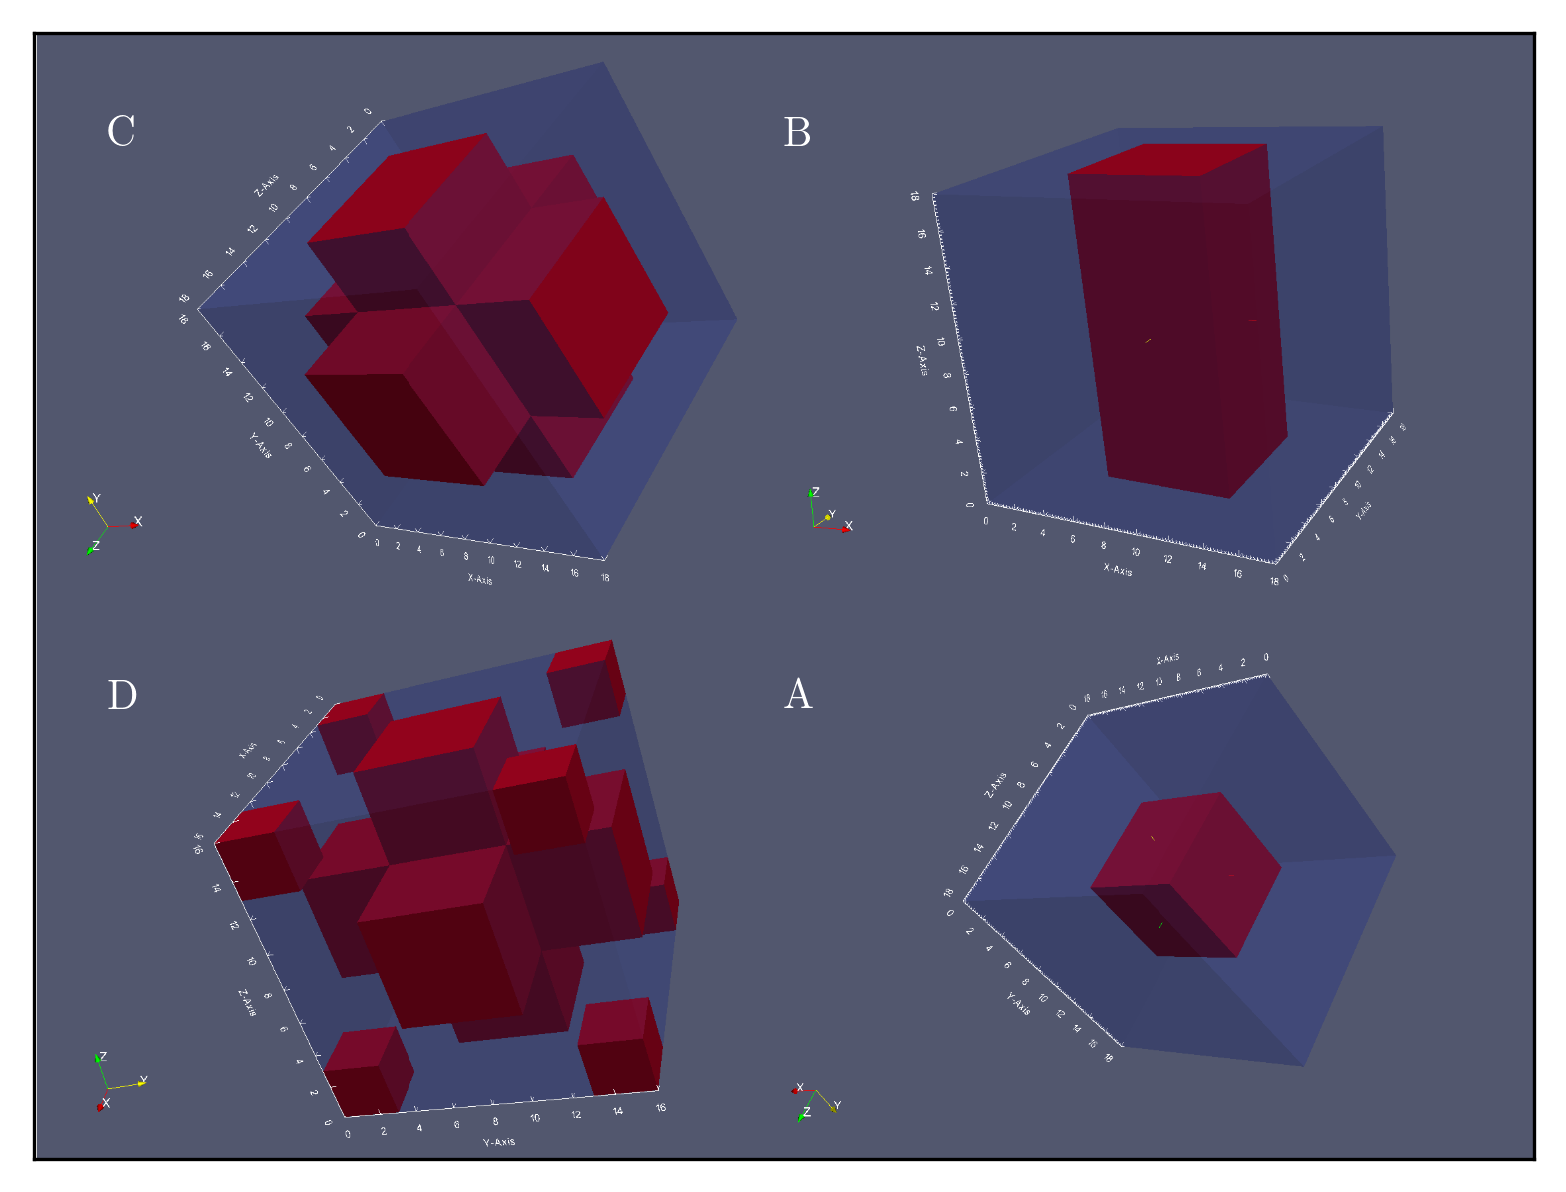

In [349]:


fig_3d_geometries = plt.figure(figsize=(5.,  3.8), dpi=300)

pos = [0.0, 0.0, 1.,1.]


img_actin=mpimg.imread('../geometries3d.png')


sub = fig_3d_geometries.add_axes(pos)
sub.imshow(img_actin)
sub.set_xticks([])
sub.set_yticks([])
sub.text(0.05, 0.9, 'C', transform=sub.transAxes, fontsize=10, color='white')
sub.text(0.05, 0.4, 'D', transform=sub.transAxes, fontsize=10, color='white')
sub.text(0.5, 0.9, 'B', transform=sub.transAxes, fontsize=10, color='white')
sub.text(0.5, 0.4, 'A', transform=sub.transAxes, fontsize=10, color='white')


fig_3d_geometries.savefig('./../results/geometries3d.eps')
plt.show()